<a href="https://colab.research.google.com/github/gavrieldavidov/gavriel/blob/main/DATA%20ANALYSIS%20PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

עבודה

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function נותן לה טבלה והיא מפצלת את זה בין הטריינים לssets.
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from google.colab import files
import matplotlib.pylab as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from scipy import stats

In [ ]:
st = pd.read_csv("StudentsPerformance.csv")
st.rename(columns={'race/ethnicity':'race','test preparation course':'test_preparation_course','parental level of education':'parental_level_of_education'},inplace=True)

In [ ]:
st['score avg']=(st['math score']+st['reading score']+st['writing score'])/3
st

,gender,race,parental_level_of_education,lunch,test_preparation_course,math score,reading score,writing score,score avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [ ]:
st=st.drop(columns=['writing score'])
st=st.drop(columns=['reading score'])
st=st.drop(columns=['math score'])
st['score avg']=st['score avg'].astype(int)
st

,gender,race,parental_level_of_education,lunch,test_preparation_course,score avg
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,82
2,female,group B,master's degree,standard,none,92
3,male,group A,associate's degree,free/reduced,none,49
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94
996,male,group C,high school,free/reduced,none,57
997,female,group C,high school,free/reduced,completed,65
998,female,group D,some college,standard,completed,74


In [ ]:
st['pass_fail']=np.full(len(st['score avg']),' ')
st.loc[st['score avg']<60, 'pass_fail']="Fail"
st.loc[st['score avg']>=60, 'pass_fail']="Pass"
st

,gender,race,parental_level_of_education,lunch,test_preparation_course,score avg,pass_fail
0,female,group B,bachelor's degree,standard,none,72,Pass
1,female,group C,some college,standard,completed,82,Pass
2,female,group B,master's degree,standard,none,92,Pass
3,male,group A,associate's degree,free/reduced,none,49,Fail
4,male,group C,some college,standard,none,76,Pass
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94,Pass
996,male,group C,high school,free/reduced,none,57,Fail
997,female,group C,high school,free/reduced,completed,65,Pass
998,female,group D,some college,standard,completed,74,Pass


pass_fail,Fail,Pass,% fail
gender,,,
female,124,394,23.938224
male,161,321,33.402490


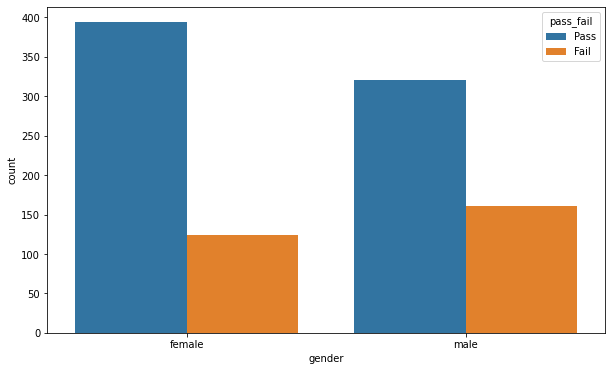

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sn.countplot(x="gender", hue="pass_fail", data=st)

count_st = pd.crosstab(st.gender,st.pass_fail)
count_st['% fail']=(count_st['Fail']/(count_st['Fail']+count_st['Pass']))*100
count_st

In [ ]:
#count_st.loc['female','Fail']
#count_st.loc['female'].sum()
#count_st['Fail'].sum()
#count_st.sum().sum()
count_st.to_numpy()
count_mat = count_st.to_numpy()
count_mat.sum()
count_mat.sum(axis=0)
count_mat.sum(axis=1)



array([541.93822394, 515.40248963])

In [ ]:
expected_mat = np.outer(count_mat.sum(axis=1)/count_mat.sum(),count_mat.sum(axis=0))

chi2_values = (count_mat - expected_mat)**2 / expected_mat
chi2_values
chi2_values.sum()
p_value1=1 - stats.chi2.cdf(chi2_values.sum(),1)
p_value1

0.0002858220680724832

pass_fail,Fail,Pass,% fail
race,,,
group A,40,49,44.943820
group B,59,131,31.052632
group C,97,222,30.407524
group D,65,197,24.809160
group E,24,116,17.142857


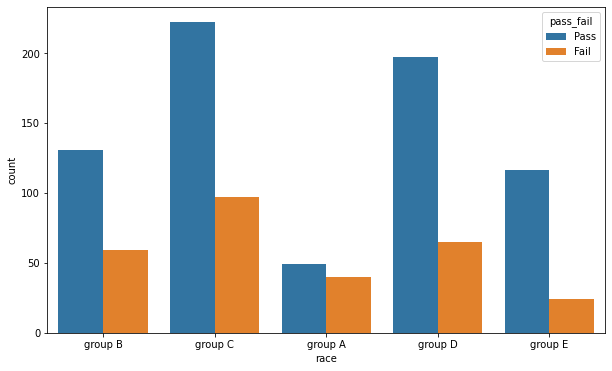

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sn.countplot(x="race", hue="pass_fail", data=st)

count_st2 = pd.crosstab(st.race,st.pass_fail)
count_st2['% fail']=(count_st2['Fail']/(count_st2['Fail']+count_st2['Pass']))*100
count_st2

In [ ]:
count_st2.to_numpy()
count_mat2 = count_st2.to_numpy()
count_mat2.sum()
count_mat2.sum(axis=0)
count_mat2.sum(axis=1)
expected_mat2 = np.outer(count_mat2.sum(axis=1)/count_mat2.sum(),count_mat2.sum(axis=0))
chi2_values2 = (count_mat2 - expected_mat2)**2 / expected_mat2
chi2_values2
chi2_values2.sum()
p_value2=1 - stats.chi2.cdf(chi2_values2.sum(),4)
p_value2


0.0

pass_fail,Fail,Pass,% fail
test_preparation_course,,,
completed,60,298,16.759777
none,225,417,35.046729


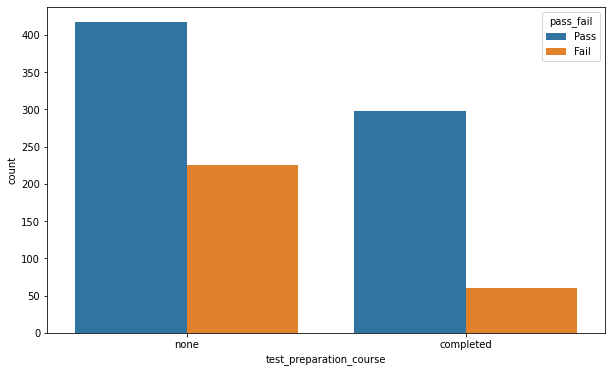

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sn.countplot(x="test_preparation_course", hue="pass_fail", data=st)

count_st3 = pd.crosstab(st.test_preparation_course,st.pass_fail)
count_st3['% fail']=(count_st3['Fail']/(count_st3['Fail']+count_st3['Pass']))*100
count_st3

In [ ]:
count_st3.to_numpy()
count_mat3 = count_st3.to_numpy()
count_mat3.sum()
count_mat3.sum(axis=0)
count_mat3.sum(axis=1)
expected_mat3 = np.outer(count_mat3.sum(axis=1)/count_mat3.sum(),count_mat3.sum(axis=0))
chi2_values3 = (count_mat3 - expected_mat3)**2 / expected_mat3
chi2_values3
chi2_values3.sum()
p_value3=1 - stats.chi2.cdf(chi2_values3.sum(),1)
p_value3

6.883343894870109e-10

pass_fail,Fail,Pass,% fail
parental_level_of_education,,,
associate's degree,59,163,26.576577
bachelor's degree,21,97,17.796610
high school,76,120,38.775510
master's degree,10,49,16.949153
some college,55,171,24.336283
some high school,64,115,35.754190


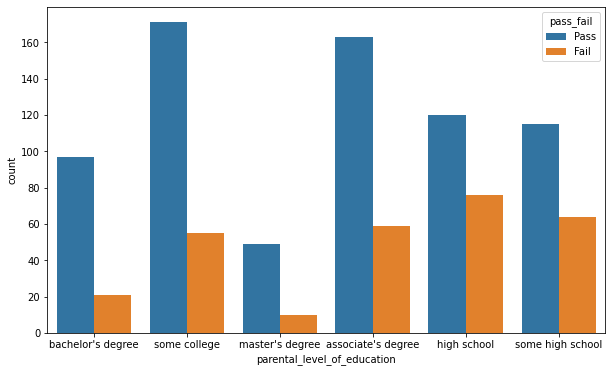

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sn.countplot(x="parental_level_of_education", hue="pass_fail", data=st)

count_st4 = pd.crosstab(st.parental_level_of_education,st.pass_fail)
count_st4['% fail']=(count_st4['Fail']/(count_st4['Fail']+count_st4['Pass']))*100
count_st4

In [ ]:
count_st4.to_numpy()
count_mat4 = count_st4.to_numpy()
count_mat4.sum()
count_mat4.sum(axis=0)
count_mat4.sum(axis=1)
expected_mat4 = np.outer(count_mat4.sum(axis=1)/count_mat4.sum(),count_mat4.sum(axis=0))
chi2_values4 = (count_mat4 - expected_mat4)**2 / expected_mat4
chi2_values4
chi2_values4.sum()
p_value4=1 - stats.chi2.cdf(chi2_values4.sum(),5)
p_value4

1.4734356956758177e-07

In [ ]:
#Fail_mean = count_st.Fail.mean()
#count_st['chi_sq'] = count_st['Fail'].apply(lambda x: ((x-Fail_mean)**2)/Fail_mean)
#count_st

In [ ]:
st_new=st
dict_gender = {'female':0,'male':1}
st_new['gender']=st['gender'].apply(lambda x: dict_gender[x]).astype('category')
dict_race = {'group A':0,'group B':1,'group C':2,'group D':3,'group E':4}
st_new['race']=st['race'].apply(lambda x: dict_race[x]).astype('category')
dict_parent_education = {'some college':0,"associate's degree":1,'high school':2,'some high school':3,"bachelor's degree":4,"master's degree":5}
st_new['parental_level_of_education']=st['parental_level_of_education'].apply(lambda x: dict_parent_education[x]).astype('category')
dict_lunch = {'standard':0,'free/reduced':1}
st_new['lunch']=st['lunch'].apply(lambda x: dict_lunch[x]).astype('category')
dict_test_preperation = {'none':0,'completed':1}
st_new['test_preparation_course']=st['test_preparation_course'].apply(lambda x: dict_test_preperation[x]).astype('category')
st_new


,gender,race,parental_level_of_education,lunch,test_preparation_course,score avg,pass_fail
0,0,1,4,0,0,72,Pass
1,0,2,0,0,1,82,Pass
2,0,1,5,0,0,92,Pass
3,1,0,1,1,0,49,Fail
4,1,2,0,0,0,76,Pass
...,...,...,...,...,...,...,...
995,0,4,5,0,1,94,Pass
996,1,2,2,1,0,57,Fail
997,0,2,2,1,1,65,Pass
998,0,3,0,0,1,74,Pass


**Decision Tree Algoritem**

In [ ]:
#split dataset in features and target variable
feature_cols = ['gender','race','parental_level_of_education','test_preparation_course']
X = st_new[feature_cols] # Features
y = st_new.pass_fail # Target variable

In [ ]:
y

0      Pass
1      Pass
2      Pass
3      Fail
4      Pass
       ... 
995    Pass
996    Fail
997    Pass
998    Pass
999    Pass
Name: pass_fail, Length: 1000, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
      

In [ ]:
y_test.values

array(['Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail',
       'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass',
       'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass',
       'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail',
       'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass',
       'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass',
       'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail',
      

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.73


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 12,  74],
       [  7, 207]])

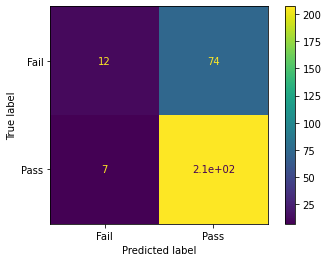

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision_score(y_test,y_pred)
print(precision_score(y_test,y_pred))  #כמה באמת עברו מתוך כל מה שניבאנו שעבר
print(recall_score(y_test,y_pred)) #כמה באמת עברו מתוך 
print(accuracy_score(y_test,y_pred)) #רמת הדיוק
print(f1_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: ignored

In [ ]:
import graphviz
from sklearn.datasets import load_iris
from sklearn import tree 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['gender','race','parental_level_of_education','test_preparation_course'],  
                     class_names=['pass','fail'], rotate=False,
                     filled=True, rounded=True,  
                     special_characters=True) 


In [ ]:
graph = graphviz.Source(dot_data)  

graph.render("StudentsPerformance")
files.download('StudentsPerformance.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Bayesian-naïve Algoritem**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
st_new2=st_new
dict_pass_fail = {'Fail':0,'Pass':1}
st_new2['pass_fail']=st_new['pass_fail'].apply(lambda x: dict_pass_fail[x]).astype('category')


In [ ]:
st_new2=st_new2.drop(columns=['lunch'])
st_new2=st_new2.drop(columns=['score avg'])
st_new2

,gender,race,parental_level_of_education,test_preparation_course,pass_fail
0,0,1,4,0,1
1,0,2,0,1,1
2,0,1,5,0,1
3,1,0,1,0,0
4,1,2,0,0,1
...,...,...,...,...,...
995,0,4,5,1,1
996,1,2,2,0,0
997,0,2,2,1,1
998,0,3,0,1,1


In [ ]:
features = ['gender','race','parental_level_of_education','test_preparation_course']
X_train, X_test, y_train, y_test = train_test_split(st_new2[features], st['pass_fail'], test_size=0.3)#,random_state=109)

In [ ]:
model = GaussianNB()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.73


In [ ]:
# ["female", "group A", "complete"]
print(model.predict([[1, 2, 0, 0]]))

[1]


In [ ]:
# ["male", "group A","some highschool", "none"]
print(model.predict([[1,0,0,0]]))

[0]


In [ ]:
model.predict(X_test) == y_test

724    False
920     True
684     True
956     True
850     True
       ...  
414     True
138     True
237     True
500     True
437     True
Name: pass_fail, Length: 300, dtype: bool

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 15,  71],
       [ 18, 196]])

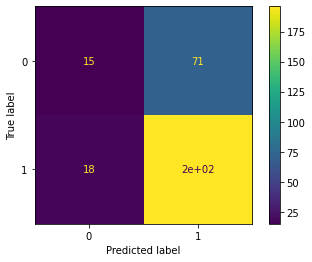

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print(precision_score(y_test,y_pred))  #כמה באמת עברו מתוך כל מה שניבאנו שעבר
print(recall_score(y_test,y_pred)) #כמה באמת עברו מתוך () 
print(accuracy_score(y_test,y_pred)) #רמת הדיוק
print(f1_score(y_test,y_pred))

0.7340823970037453
0.9158878504672897
0.7033333333333334
0.8149688149688151


**ROC curve**

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
features = ['gender','race','parental_level_of_education','test_preparation_course']
trainX, testX, trainy, testy = train_test_split(st_new2[features], st_new2['pass_fail'], test_size=0.3, random_state=1)

In [ ]:
DTmodel = DecisionTreeClassifier(max_depth=4)
DTmodel.fit(trainX, trainy)

In [ ]:
DTprobs = DTmodel.predict_proba(testX)
DTprobs[:10,:]

In [ ]:
DTprobs = DTprobs[:, 1]

In [ ]:
DTauc = roc_auc_score(testy, DTprobs)
print('AUC: %.2f' % DTauc)

In [ ]:
DTfpr, DTtpr, DTthresholds = roc_curve(testy, DTprobs)

In [ ]:
NBmodel = GaussianNB()
# Train the model
NBmodel.fit(trainX, trainy)

In [ ]:
NBprobs = NBmodel.predict_proba(testX)
NBprobs.shape

In [ ]:
NBprobs = NBprobs[:, 1]

In [ ]:
NBauc = roc_auc_score(testy, NBprobs)
print('AUC: %.2f' % NBauc)

In [ ]:
NBfpr, NBtpr, RFthresholds = roc_curve(testy, NBprobs)

In [ ]:
plt.figure(dpi=150)
plt.plot(DTfpr, DTtpr, color='orange', label='DT ROC')
plt.plot(NBfpr, NBtpr, color='blue', label='NB ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()